In [6]:
import pandas as pd
path = 'D:/OAMK/Mobiiliohjelmointi/syksy2024/Python/Viikko 3 fysiikka/Raw Data (1).csv'
df = pd.read_csv(path)
df.head()


,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.000000,65.062460,25.473440,17.414880,34.899998,NaN,NaN,0.001777,43.354,3.555347,0.0
1,22.492468,65.062473,25.473461,17.414877,34.899998,NaN,NaN,0.047313,27.222,1.265743,0.0
2,37.234157,65.062883,25.473493,29.514729,47.000000,0.00,0.0,0.051732,12.500,100.000000,7.0
3,38.204566,65.062893,25.473402,28.514715,46.000000,0.03,0.0,0.053003,11.000,100.000000,8.0
4,39.190050,65.062899,25.473379,26.514710,44.000000,0.03,0.0,0.054394,9.500,100.000000,8.0


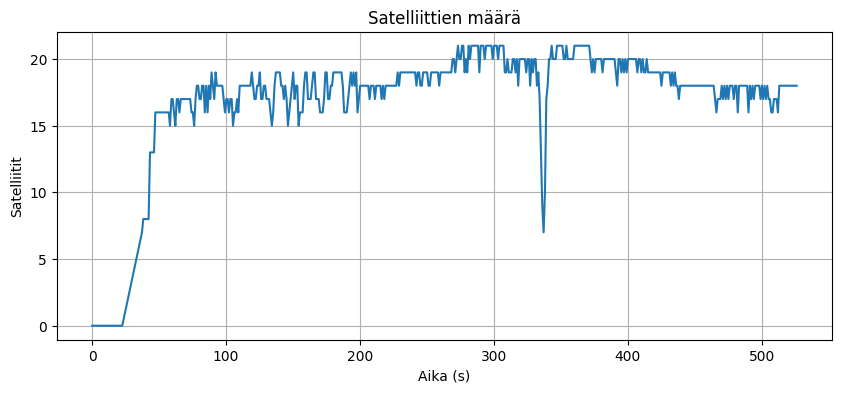

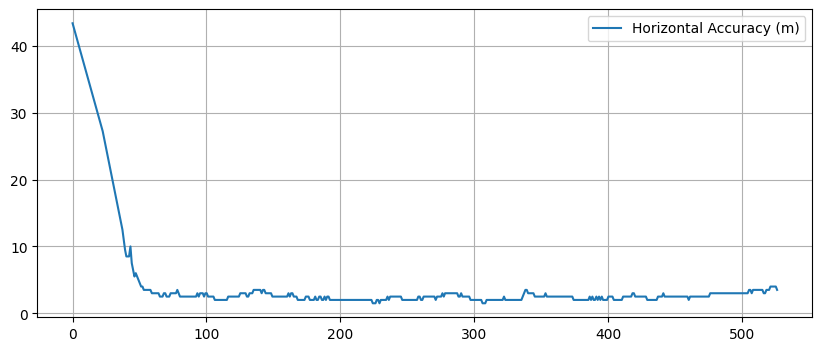

In [7]:
import folium as fol
from IPython.display import display

#df = df[df['Satellites'] > 0].reset_index(drop=True)

lat_average = df['Latitude (°)'].mean()
long_average = df['Longitude (°)'].mean()

my_map = fol.Map(Location=[lat_average, long_average], zoom_start=2)

fol.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'red', opacity = 1).add_to(my_map)

my_map.save('kartta_oulusta.html')
display(my_map)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Satellites'])
plt.grid()
plt.xlabel('Aika (s)')
plt.ylabel('Satelliitit')
plt.title('Satelliittien määrä')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Horizontal Accuracy (m)'])
plt.legend(['Horizontal Accuracy (m)'])
plt.grid()
plt.show()



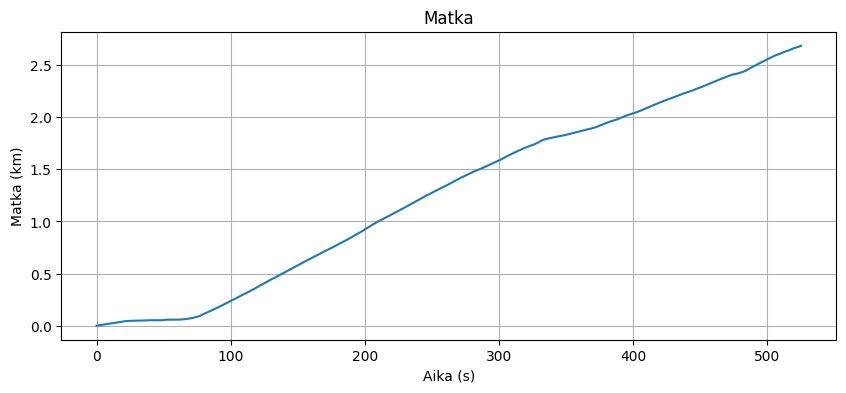

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Distance (km)'])
plt.grid()
plt.title('Matka')
plt.ylabel('Matka (km)')
plt.xlabel('Aika (s)')
plt.show()



In [9]:
import numpy as np
from math import radians, cos, asin, sin, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = [radians(x) for x in [lon1, lat1, lon2, lat2]]
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

lat = df['Latitude (°)'].values
lon = df['Longitude (°)'].values


df['dist'] = np.zeros(len(df))

for i in range(0, len(df)-1):
    df.loc[i, 'dist'] = haversine(lat[i], lon[i], lat[i+1], lon[i+1])
    df['tot_dist'] = np.cumsum(df['dist'])




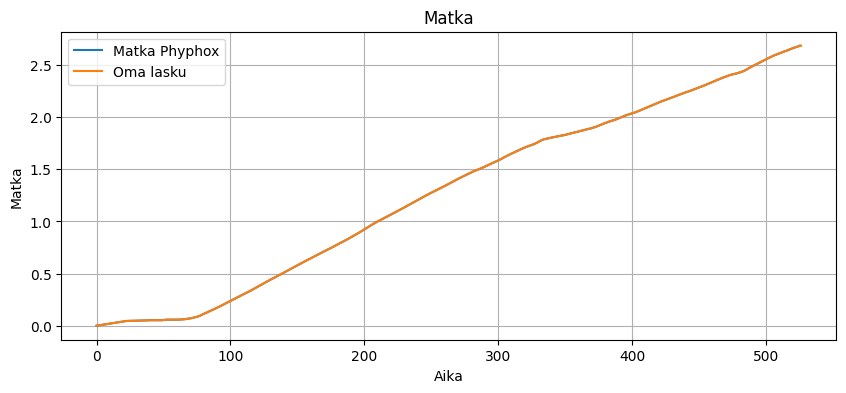

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Distance (km)'])
plt.plot(df['Time (s)'], df['tot_dist'])
plt.legend(['Matka Phyphox', 'Oma lasku'])
plt.grid()
plt.xlabel('Aika')
plt.ylabel('Matka')
plt.title('Matka')
plt.show()